# Objectives

- Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
filepath = "https://drive.google.com/uc?export=download&id=1eqztnFwnHZgXSpQuNqzF9rjFfi4MsbR9"
df = pd.read_csv(filepath)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
# Drop 2 unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)

# Using Cross validation to improve the model

Dividing the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

In [5]:
x_data = df.drop('Price', axis = 1)
y_data = df['Price']

Split the data set into training and testing subests

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)
print(x_test.shape)
print(x_train.shape)

(72, 13)
(166, 13)


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

In [7]:
lm = LinearRegression()
lm.fit(x_train[['CPU_frequency']], y_train)

print(lm.score(x_train[['CPU_frequency']], y_train))
print(lm.score(x_test[['CPU_frequency']], y_test))

0.17415138050904821
-0.032648804536480336


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.

In [8]:
Rcross = cross_val_score(lm, x_data[['CPU_frequency']], y_data, cv=4)
print(Rcross.mean(), Rcross.std())

-0.16109232388595096 0.3849579786664708


# Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=1)

To identify the point of overfitting the model on the parameter "CPU_frequency", polynomial features are created using the single attribute. 
R^2 scores of the model created are evaluated using different degrees of polynomial features, ranging from 1 to 5.

In [15]:
degrees = [1, 2, 3, 4 ,5]
lm = LinearRegression()
r2_list = []
for degree in degrees:
    pr = PolynomialFeatures(degree=degree)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lm.fit(x_train_pr, y_train)
    r2_list.append(lm.score(x_test_pr, y_test))
    
print(r2_list)

[0.02861941172016369, 0.1452088332330489, 0.156816053302391, 0.1272126771778085, 0.03547064602496264]


Plot the values of R^2 scores against the order.

Text(0.5, 1.0, 'R^2 Using Test Data')

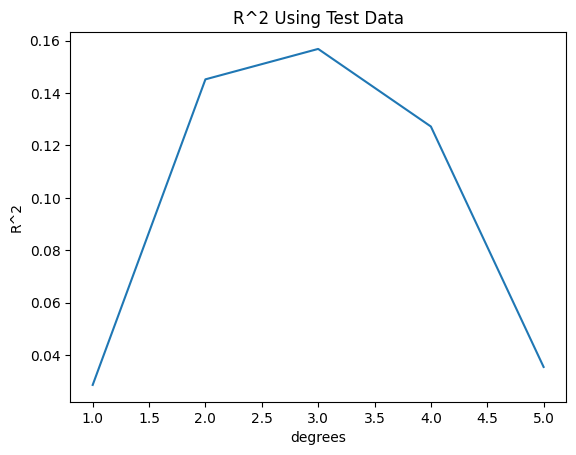

In [16]:
plt.plot(degrees, r2_list)
plt.xlabel('degrees')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

# Ridge Regression

'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [17]:
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 

In [19]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RM = Ridge(alpha=alpha)
    RM.fit(x_train_pr, y_train)
    test_score, train_score = RM.score(x_test_pr, y_test), RM.score(x_train_pr, y_train)
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:03<00:00, 326.68it/s, Test Score=0.507, Train Score=0.642]


Plot the R^2 values for training and testing sets with respect to the value of alpha


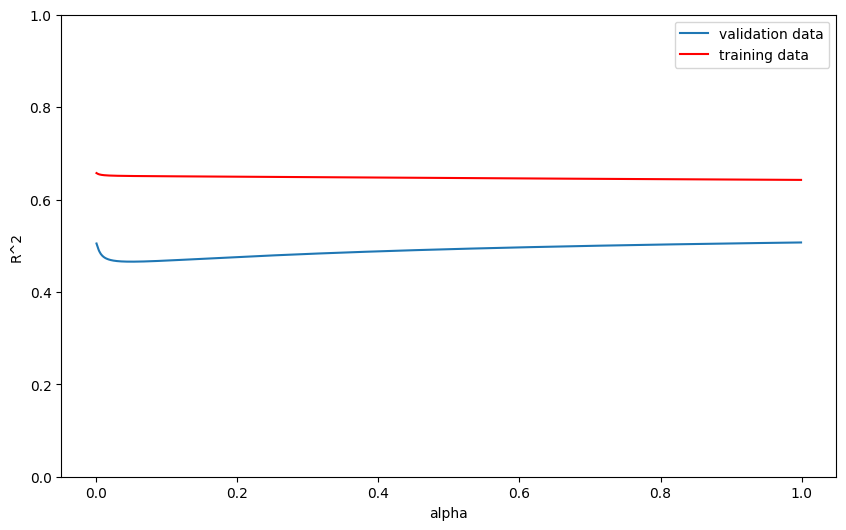

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

#  Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [21]:
parameters1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

Create a Ridge instance and run Grid Search using a 4 fold cross validation.

In [22]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the Grid Search to the training data.

In [23]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.

In [24]:
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.42296349452687454
